Система уравнений:
$$
\begin{cases}
(x - 1.4)^2 - (y - 0.6)^2 = 1, \\
4.2 x^2 + 8.8 y^2 = 1.42
\end{cases}
$$

Построим график, чтобы локализовать корни

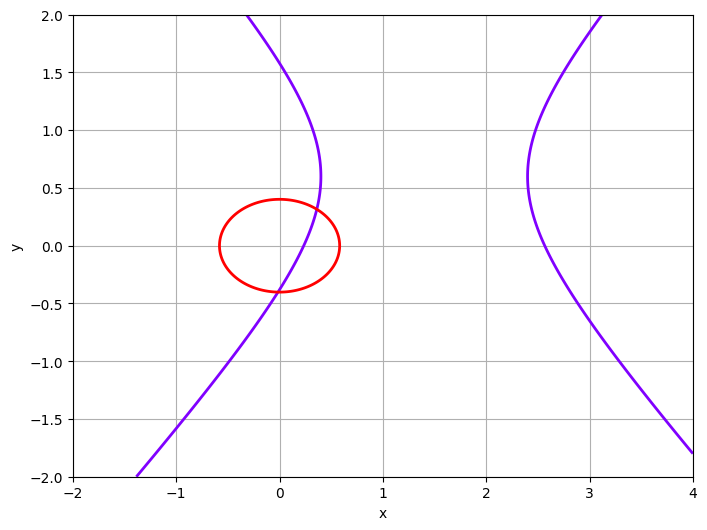

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Вспомогательная функция
# Принимает список функций и диапазон построения графика
def plot_F(funcs, x_range, y_range, trajectory = None):

    x = np.linspace(x_range[0], x_range[1], 1000)
    y = np.linspace(y_range[0], y_range[1], 1000)
    X, Y = np.meshgrid(x, y)
    
    plt.figure(figsize=(8,6))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(funcs)))
    
    for i, f in enumerate(funcs):
        plt.contour(X, Y, f(X, Y), levels=[0], colors=[colors[i]], linewidths=2)
    
    if trajectory is not None:
        trajectory_x = [point[0] for point in trajectory]
        trajectory_y = [point[1] for point in trajectory]
        plt.plot(trajectory_x, trajectory_y, 'o-', label='Итерации')
        plt.scatter(trajectory_x[-1], trajectory_y[-1], color='green', s=100, label='Конечная точка')
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

F1 = lambda X, Y: (X - 1.4)**2 - (Y - 0.6)**2 - 1
F2 = lambda X, Y: 4.2*X**2 + 8.8*Y**2 - 1.42

plot_F([F1, F2], x_range=[-2, 4], y_range=[-2, 2])


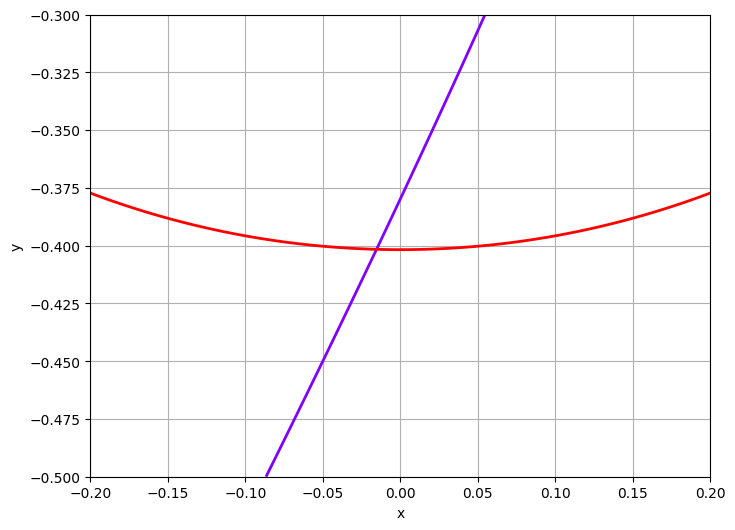

In [98]:
plot_F([F1, F2], x_range=[-0.2, 0.2], y_range=[-0.5, -0.3])

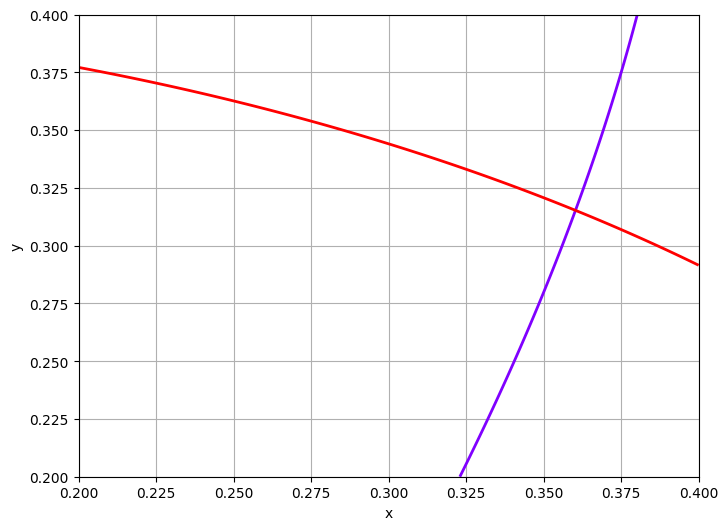

In [114]:
plot_F([F1, F2], x_range=[0.2, 0.4], y_range=[0.2, 0.4])

In [115]:
# Вспомогательная функция
# Принимает функию и отрезок и массив линий
def plot_func_with_lines(func, segment, vlines = None, hlines = None, show_axeX = True, get_max = False):
    a = segment[0]
    b = segment[1]
    xs = np.linspace(a, b, 10000)
    ys = func(xs)
    
    plt.figure(figsize=(8,5))
    plt.plot(xs, ys)
    if show_axeX:
        plt.axhline(0, color='black', linewidth=1)
    if vlines is not None:
        for vline in vlines:
            plt.vlines(vline, ymin=min(ys), ymax=max(ys), color='red', linestyles='--')
    if hlines is not None:
        for hline in hlines:
            plt.hlines(hline, xmin=min(xs), xmax=max(xs), color='red', linestyles='--')

    plt.grid(True)
    plt.show()
    
    if get_max:
        return max(ys)

Получаем две области локализации:
- $(\tilde x_1, \tilde y_1) \in \Omega_1 = [-0.2, 0]\times[-0.5, -0.3]$,
- $(\tilde x_2, \tilde y_2) \in \Omega_2 = [0.2, 0.4]\times[0.2, 0.4]$

Возьмем первую область: $\Omega_1 = [-0.2, 0]\times[-0.5, -0.3]$

В этой области выразим $x$ из $(x - 1.4)^2 - (y - 0.6)^2 = 1$, а $y$ из $4.2 x^2 + 8.8 y^2 = 1.42$

Получаем систему:
$$
\begin{cases}
x = 1.4-\sqrt{1 + (0.6-y)^2}, \\
y = -\sqrt{\frac{1.42-4.2x^2}{8.8}}
\end{cases}
$$

Возьмём отображение:
$$
G(x,y)=
\begin{pmatrix}
1.4-\sqrt{1 + (0.6-y)^2}\\[8pt]
-\sqrt{\frac{1.42-4.2y^2}{8.8}}
\end{pmatrix}
$$

Получаем 
$$
\begin{pmatrix}
\tilde x\\
\tilde y
\end{pmatrix}
=G
\begin{pmatrix}
\tilde x\\
\tilde y
\end{pmatrix}
$$

Проверим что оно является сжимающим:
- $\forall \vec{x} \in \Omega \ G(\vec{x}) \in \Omega \\$
- $\|J\|_{1} < 1 $ в области $\Omega_1$

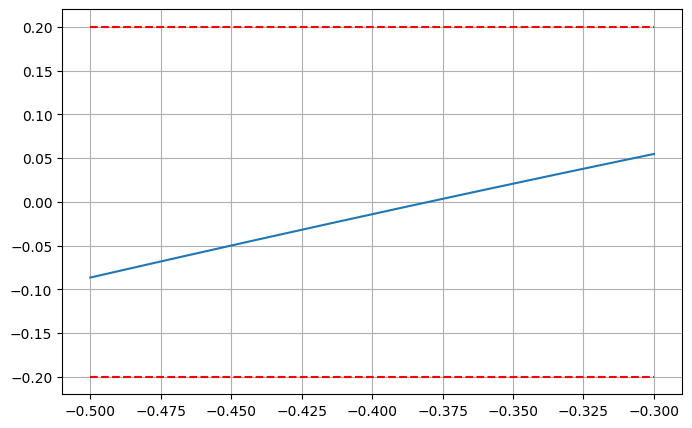

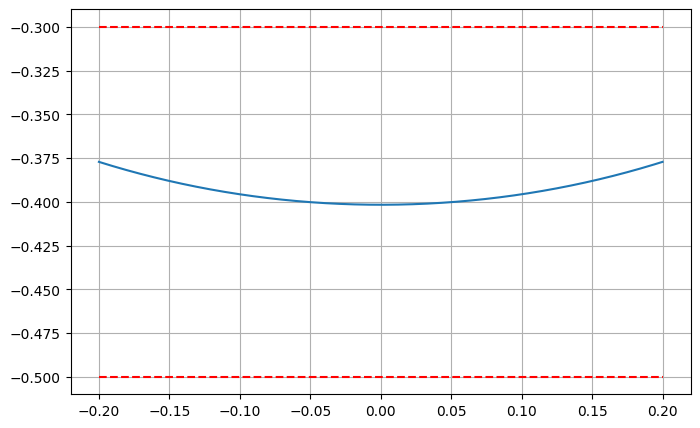

In [116]:
f_y = lambda y: 1.4 - np.sqrt(1 + (0.6 - y)**2)
f_x = lambda x: - np.sqrt((1.42 - 4.2 * x**2)/8.8)

plot_func_with_lines(func=f_y, segment=[-0.5, -0.3], hlines=[-0.2, 0.2], show_axeX=False)
plot_func_with_lines(func=f_x, segment=[-0.2, 0.2], hlines=[-0.5, -0.3], show_axeX=False)

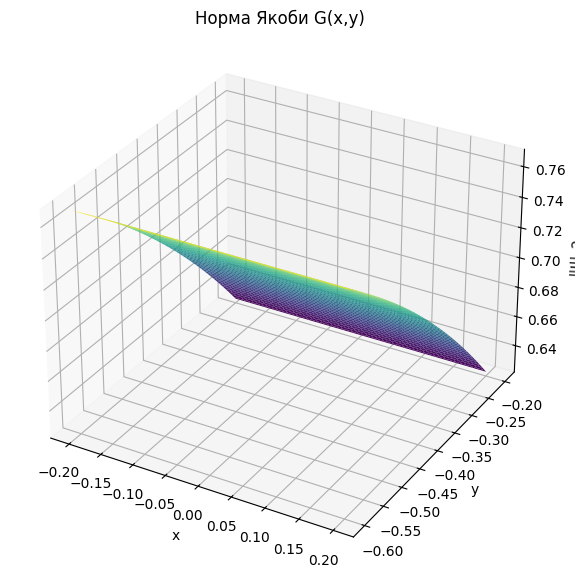

||J|| <= 0.7682212795973759


In [117]:
import numpy as np
import matplotlib.pyplot as plt

def jacobian(x, y):
    J = np.array([[0, (0.6 - y) / np.sqrt(1 + (0.6 - y)**2)],
                  [(4.2 * x) / (8.8 * np.sqrt((1.42 - 4.2 * x**2)/8.8)), 0]])
    return J

x = np.linspace(-0.2, 0.2, 100)
y = np.linspace(-0.6, -0.2, 100)
X, Y = np.meshgrid(x, y)

max_norm_J = 0
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        J = jacobian(X[i,j], Y[i,j])
        Z[i,j] = np.linalg.norm(J, ord=2)
        max_norm_J = max(max_norm_J, np.abs(Z[i,j]))

# Построение графика
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('||J||_2')
ax.set_title('Норма Якоби G(x,y)')
plt.show()

print(f"||J|| <= {max_norm_J}")


Получается `G(x,y)` - сжимающее. Значит итерационный процесс $(x_n,y_n)=G(x_{n-1},y_{n-1})$ сходится.

$\|J\| \le q = 0.769 < 1 \Rightarrow e_k \le q^k e_0 \le \varepsilon$, где $e_0 = 0.4$

Получаем $k \ge \frac{ln(\frac{\varepsilon}{e_0})}{ln(q)} = 40.44$

Значит необходимо `k = 41` итерация для достижения точности $\varepsilon = 10^{-5}$

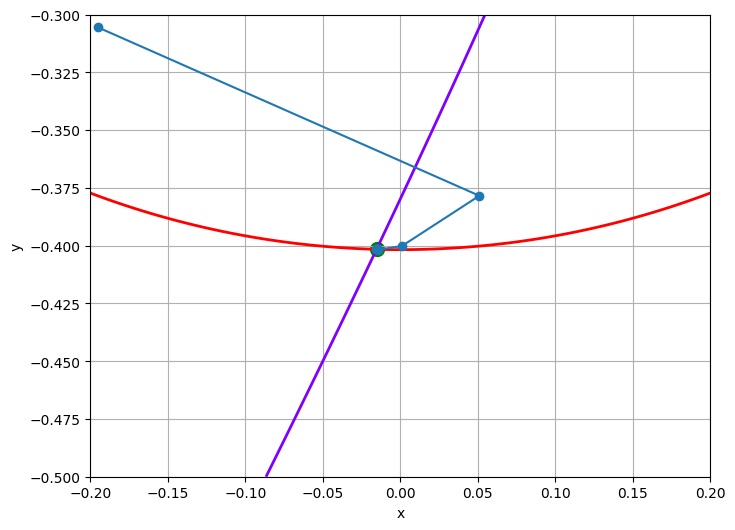

In [113]:
import random

f_x = lambda x: - np.sqrt((1.42 - 4.2 * x**2)/8.8)
f_y = lambda y: 1.4 - np.sqrt(1 + (0.6 - y)**2)

x0 = random.uniform(-0.2, 0)
y0 = random.uniform(-0.5, -0.3)
point = [x0, y0]
trajectory = [point]


def iter(point):
    return [f_y(point[1]), f_x(point[0])]

for i in range(41):
    point = iter(point)
    trajectory.append(point)
    
plot_F([F1, F2], x_range=[-0.2, 0.2], y_range=[-0.5, -0.3], trajectory=trajectory)

Возьмем теперь вторую область: $\Omega_1 = [0.2, 0.4]\times[0.2, 0.4]$

В этой области выразим $x$ из $(x - 1.4)^2 - (y - 0.6)^2 = 1$, а $y$ из $4.2 x^2 + 8.8 y^2 = 1.42$

Получаем систему:
$$
\begin{cases}
x = 1.4-\sqrt{1 + (y-0.6)^2}, \\
y = \sqrt{\frac{1.42-4.2x^2}{8.8}}
\end{cases}
$$

Возьмём отображение:
$$
G(x,y)=
\begin{pmatrix}
1.4-\sqrt{1 + (y-0.6)^2}\\[8pt]
\sqrt{\frac{1.42-4.2y^2}{8.8}}
\end{pmatrix}
$$

Получаем 
$$
\begin{pmatrix}
\tilde x\\
\tilde y
\end{pmatrix}
=G
\begin{pmatrix}
\tilde x\\
\tilde y
\end{pmatrix}
$$

Проверим что оно является сжимающим:
- $\forall \vec{x} \in \Omega \ G(\vec{x}) \in \Omega \\$
- $\|J\|_{1} < 1 $ в области $\Omega_1$

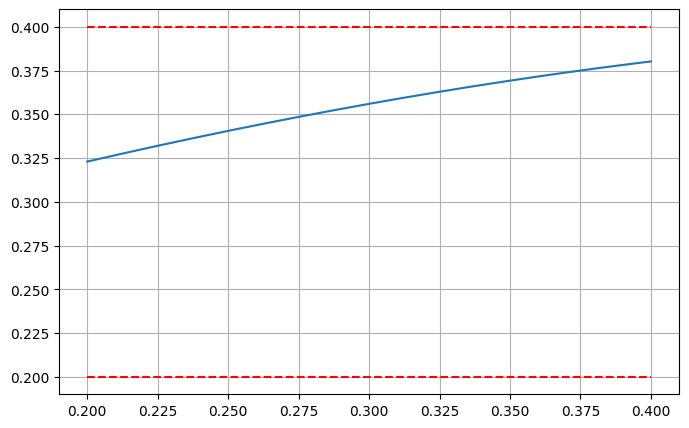

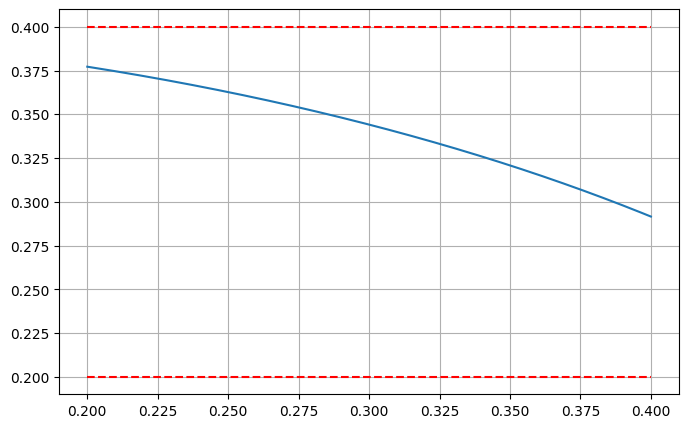

In [118]:
f_y = lambda y: 1.4 - np.sqrt(1 + (y - 0.6)**2)
f_x = lambda x: np.sqrt((1.42 - 4.2 * x**2)/8.8)

plot_func_with_lines(func=f_y, segment=[0.2, 0.4], hlines=[0.2, 0.4], show_axeX=False)
plot_func_with_lines(func=f_x, segment=[0.2, 0.4], hlines=[0.2, 0.4], show_axeX=False)

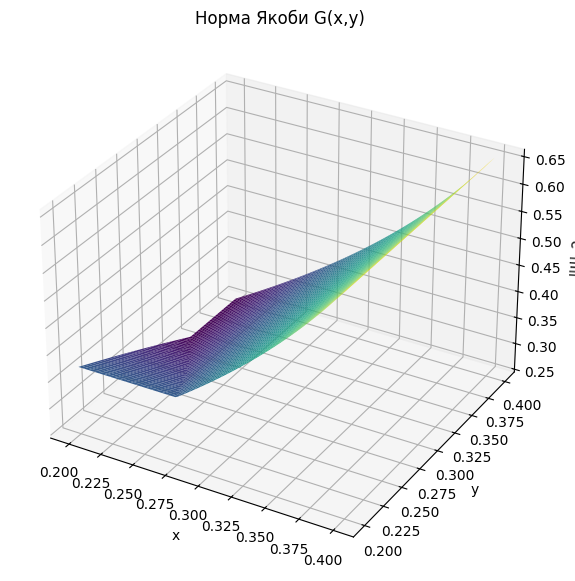

||J|| <= 0.6548127796350339


In [119]:
import numpy as np
import matplotlib.pyplot as plt

def jacobian(x, y):
    J = np.array([[0, (0.6 - y) / np.sqrt(1 + (0.6 - y)**2)],
                  [- (4.2 * x) / (8.8 * np.sqrt((1.42 - 4.2 * x**2)/8.8)), 0]])
    return J

x = np.linspace(0.2, 0.4, 100)
y = np.linspace(0.2, 0.4, 100)
X, Y = np.meshgrid(x, y)

max_norm_J = 0
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        J = jacobian(X[i,j], Y[i,j])
        Z[i,j] = np.linalg.norm(J, ord=2)
        max_norm_J = max(max_norm_J, np.abs(Z[i,j]))

# Построение графика
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('||J||_2')
ax.set_title('Норма Якоби G(x,y)')
plt.show()

print(f"||J|| <= {max_norm_J}")


Получается `G(x,y)` - сжимающее. Значит итерационный процесс $(x_n,y_n)=G(x_{n-1},y_{n-1})$ сходится.

$\|J\| \le q = 0.655 < 1 \Rightarrow e_k \le q^k e_0 \le \varepsilon$, где $e_0 = 0.4$

Получаем $k \ge \frac{ln(\frac{\varepsilon}{e_0})}{ln(q)} = 25.06$

Значит необходимо `k = 26` итераций для достижения точности $\varepsilon = 10^{-5}$

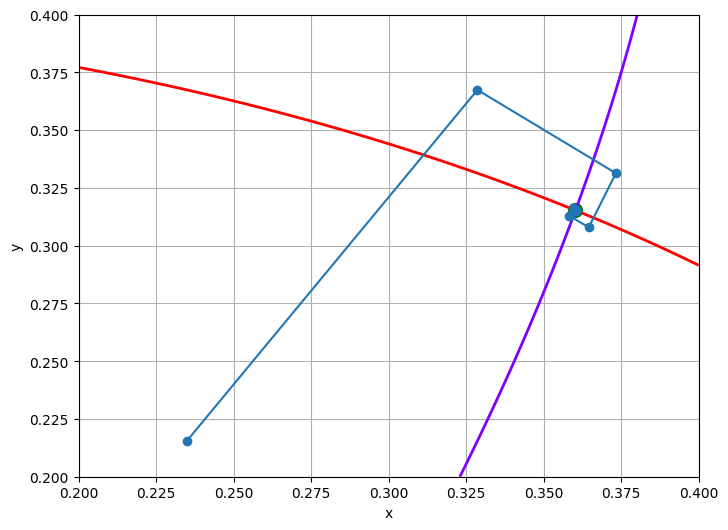

In [154]:
import random

f_x = lambda x: np.sqrt((1.42 - 4.2 * x**2)/8.8)
f_y = lambda y: 1.4 - np.sqrt(1 + (0.6 - y)**2)

x0 = random.uniform(0.2, 0.4)
y0 = random.uniform(0.2, 0.4)
point = [x0, y0]
trajectory = [point]

def iter(point):
    return [f_y(point[1]), f_x(point[0])]

for i in range(41):
    point = iter(point)
    trajectory.append(point)
    
plot_F([F1, F2], x_range=[0.2, 0.4], y_range=[0.2, 0.4], trajectory=trajectory)